# *Data Visiulization*



In this we will use matplotlib and Seaborn. They are all external libraries that need to be installed. To install them using pip, run the following command:

In [ ]:
!pip install matplotlib seaborn

For demonstration purposes, we will also use the MNIST handwritten digits dataset. We will load it from TensorFlow. Hence we will also need to install TensorFlow and pandas

In [ ]:
!pip install tensorflow pandas

The code afterward will assume the following imports are executed:

In [1]:

# Importing from tensorflow and keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras import utils
from tensorflow import dtypes, tensordot
from tensorflow import convert_to_tensor, linalg, transpose
# For math operations
import numpy as np
# For plotting with matplotlib
import matplotlib.pyplot as plt
# For plotting with seaborn
import seaborn as sns  
# For plotting with bokeh
from bokeh.plotting import figure, show
from bokeh.models import Legend, LegendItem
# For pandas dataframe
import pandas as pd

We load the MNIST dataset from the keras.datasets library. To keep things simple, we’ll retain only the subset of data containing the first three digits. We’ll also ignore the test set for now.

In [2]:

# load dataset
(x_train, train_labels), (_, _) = mnist.load_data()
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Shape of training data
total_examples, img_length, img_width = x_train.shape
# Print the statistics
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)


11490434/11490434 [==============================] - 0s 0us/step
Training data has  18623 images
Each image is of size  28 x 28


Seaborn is indeed an add-on to matplotlib. Therefore, you need to understand how matplotlib handles plots even if using Seaborn.

Matplotlib calls its canvas the figure. You can divide the figure into several sections called subplots, so you can put two visualizations side-by-side.

For example, let’s visualize the first 16 images of our MNIST dataset using matplotlib. We’ll create 2 rows and 8 columns using the subplots() function. The subplots() function will create the axes objects for each unit. Then we will display each image on each axes object using the imshow() method. Finally, the figure will be shown using the show() function:

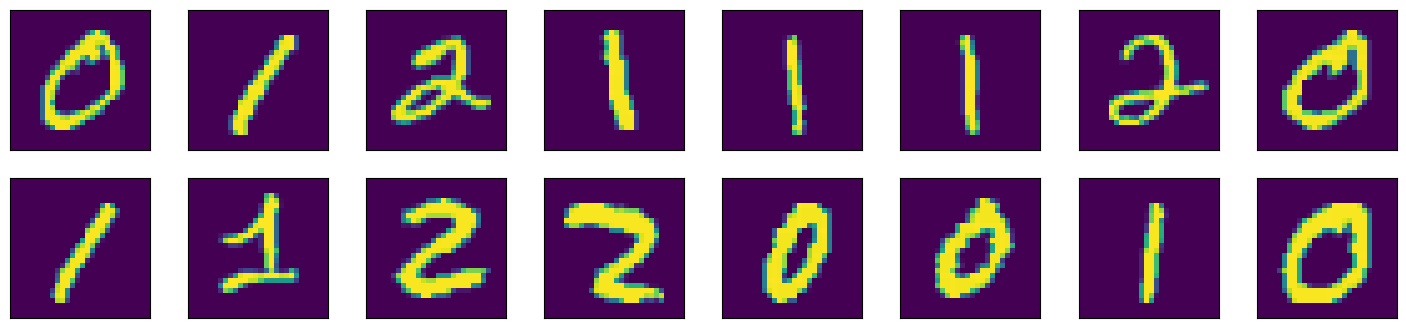

In [3]:
img_per_row = 8
fig,ax = plt.subplots(nrows=2, ncols=img_per_row,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
for row in [0, 1]:
    for col in range(img_per_row):
        ax[row, col].imshow(x_train[row*img_per_row + col].astype('int'))   
plt.show()

## Scatter Plots in matplotlib and Seaborn ##
One common visualization we use in machine learning projects is the scatter plot.

For example, we apply PCA to the MNIST dataset and extract the first three components of each image. In the code below, we compute the eigenvectors and eigenvalues from the dataset, then project the data of each image along the direction of the eigenvectors and store the result in x_pca. For simplicity, we didn’t normalize the data to zero mean and unit variance before computing the eigenvectors. This omission does not affect our purpose of visualization.

In [4]:
# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

3 largest eigenvalues:  tf.Tensor([5.1999642e+09 1.1419439e+10 4.8231231e+10], shape=(3,), dtype=float32)


The array x_pca is in the shape 18623 x 784. Let’s consider the last two columns as the x- and y-coordinates and make the point of each row in the plot. We can further color the point according to which digit it corresponds to.

The following code generates a scatter plot using matplotlib. The plot is created using the axes object’s scatter() function, which takes the x- and y-coordinates as the first two arguments. The c argument to the scatter() method specifies a value that will become its color. The s argument specifies its size. The code also creates a legend and adds a title to the plot.

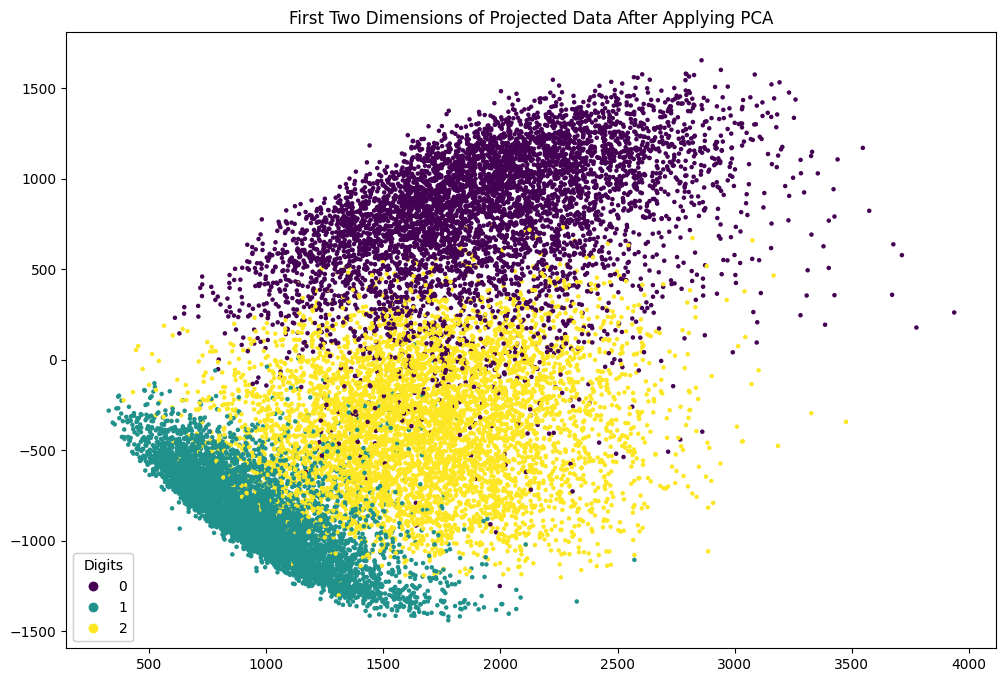

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x_pca[:, -1], x_pca[:, -2], c=train_labels, s=5)
legend_plt = ax.legend(*scatter.legend_elements(),
                       loc="lower left", title="Digits")
ax.add_artist(legend_plt)
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

Matplotlib also allows a 3D scatter plot to be produced. To do so, you need to create an axes object with 3D projection first. Then the 3D scatter plot is created with the scatter3D() function, with the x-, y-, and z-coordinates as the first three arguments. The code below uses the data projected along the eigenvectors corresponding to the three largest eigenvalues. Instead of creating a legend, this code creates a color bar:

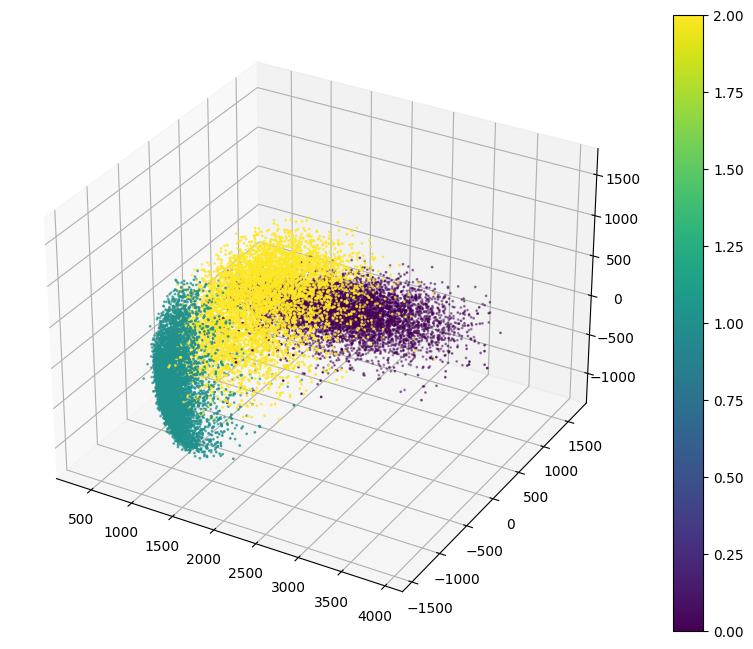

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
plt_3d = ax.scatter3D(x_pca[:, -1], x_pca[:, -2], x_pca[:, -3], c=train_labels, s=1)
plt.colorbar(plt_3d)
plt.show()

### Seaborn
Creating scatter plots in Seaborn is similarly easy. The scatterplot() method automatically creates a legend and uses different symbols for different classes when plotting the points. By default, the plot is created on the “current axes” from matplotlib, unless the axes object is specified by the ax argument.

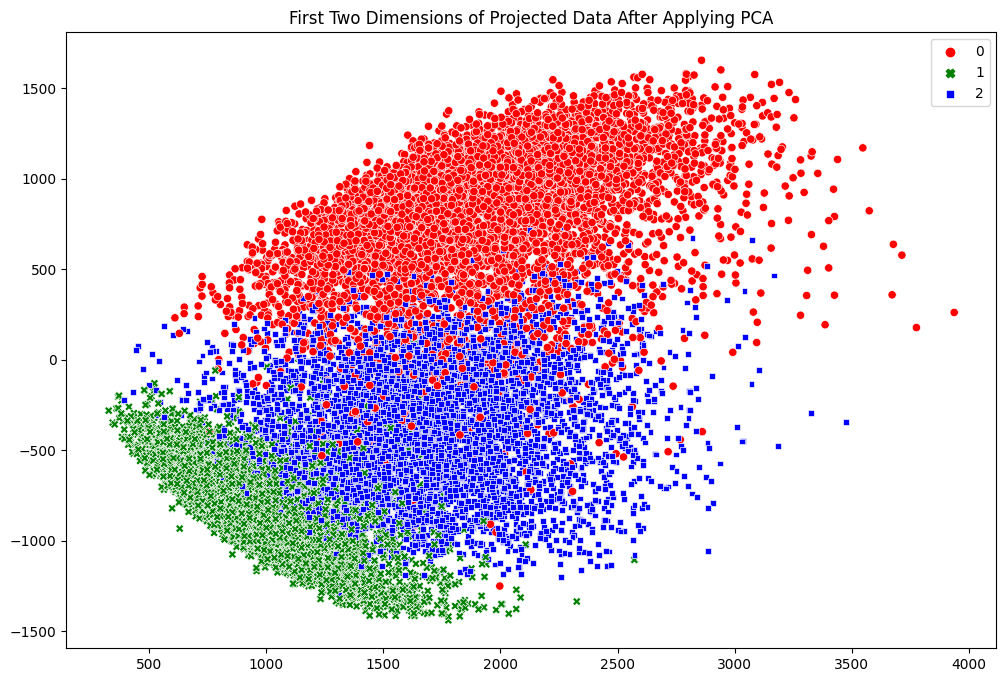

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
x = x_pca[:, -1]
y = x_pca[:, -2]
sns.scatterplot(x=x, y=y,
                style=train_labels, hue=train_labels,
                palette=["red", "green", "blue"], ax=ax)
ax.set_title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

The benefit of Seaborn over matplotlib is twofold: First, we have a polished default style. For example, if we compare the point style in the two scatter plots above, the Seaborn one has a border around the dot to prevent the many points from being smudged together. Indeed, if we run the following line before calling any matplotlib functions:

In [ ]:
sns.set(style = "darkgrid")

We can still use the matplotlib functions but get a better looking figure by using Seaborn’s style. Secondly, it is more convenient to use Seaborn if we are using a pandas DataFrame to hold our data. As an example, let’s convert our MNIST data from a tensor into a pandas DataFrame:

In [8]:
df_mnist = pd.DataFrame(x_pca[:, -3:].numpy(), columns=["pca3","pca2","pca1"])
df_mnist["label"] = train_labels
print(df_mnist)

             pca3        pca2         pca1  label
0     -537.730103  926.885254  1965.881592      0
1      167.375885 -947.360107  1070.359375      1
2      553.685425 -163.121826  1754.754272      2
3     -642.905579 -767.283020  1053.937988      1
4     -651.812988 -586.034424   662.468201      1
...           ...         ...          ...    ...
18618  415.358948 -645.245972   853.439209      1
18619  754.555786    7.873116  1897.690552      2
18620 -321.809357  665.038086  1840.480225      0
18621  643.843628  -85.524895  1113.795166      2
18622   94.964279 -549.570984   561.743042      1

[18623 rows x 4 columns]


Then, we can reproduce the Seaborn’s scatter plot with the following:

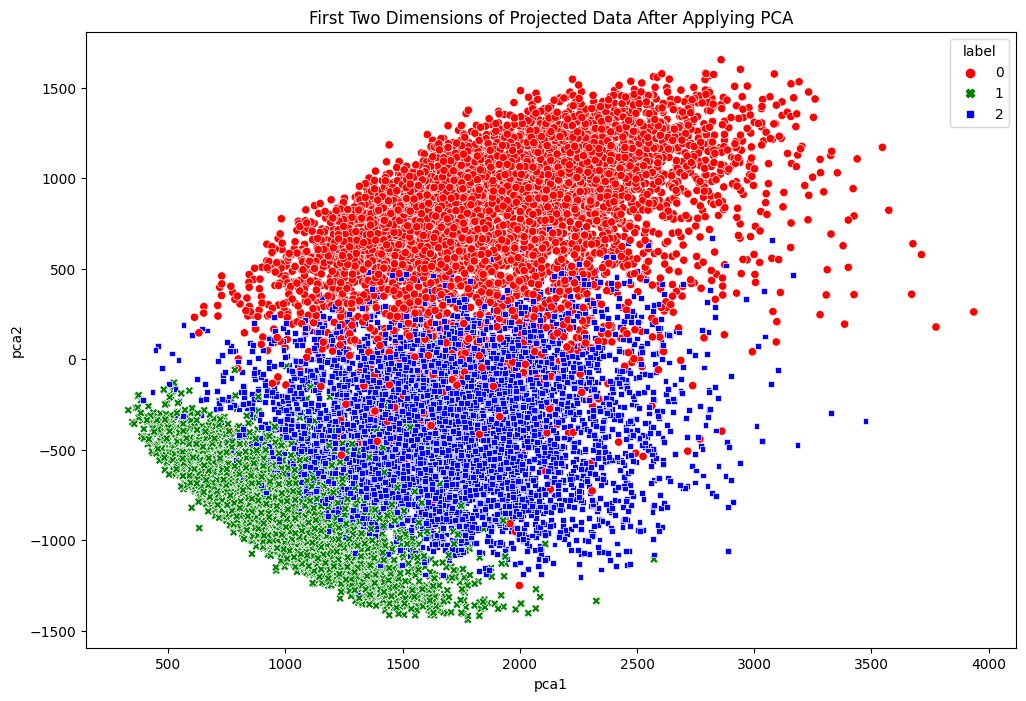

In [9]:

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_mnist, x="pca1", y="pca2",
                style="label", hue="label",
                palette=["red", "green", "blue"])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()


Seaborn, as a wrapper to some matplotlib functions, is not replacing matplotlib entirely. Plotting in 3D, for example, is not supported by Seaborn, and we still need to resort to matplotlib functions for such purposes.

#### Preparation of Line Plot Ddata ####
Before we move on to show how we can visualize line plot data, let’s generate some data for illustration. Below is a simple classifier using the Keras library, which we train to learn the handwritten digit classification. The history object returned by the fit() method is a dictionary that contains all the learning history of the training stage. For simplicity, we’ll train the model using only 10 epochs.

In [10]:

epochs = 10
y_train = utils.to_categorical(train_labels)
input_dim = img_length*img_width
# Create a Sequential model
model = Sequential()
# First layer for reshaping input images from 2D to 1D
model.add(Reshape((input_dim, ), input_shape=(img_length, img_width)))
# Dense layer of 8 neurons
model.add(Dense(8, activation='relu'))
# Output layer
model.add(Dense(total_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=10, verbose=0)
print('Learning history: ', history.history)

Learning history:  {'loss': [0.6041877269744873, 0.13602402806282043, 0.0993175134062767, 0.08362744748592377, 0.061370063573122025, 0.04693842679262161, 0.04702650383114815, 0.0549049936234951, 0.042851969599723816, 0.03898709639906883], 'accuracy': [0.9251422882080078, 0.9630520343780518, 0.9687424898147583, 0.9759557843208313, 0.9814057946205139, 0.9842910766601562, 0.985012412071228, 0.9847719669342041, 0.9872565269470215, 0.9870160818099976], 'val_loss': [0.1526811569929123, 0.13633568584918976, 0.09130462259054184, 0.0755988359451294, 0.0661052018404007, 0.07612424343824387, 0.06221764162182808, 0.0508737713098526, 0.058488573879003525, 0.07013072073459625], 'val_accuracy': [0.9428896903991699, 0.9777090549468994, 0.9645297527313232, 0.9835665225982666, 0.9801496863365173, 0.981776773929596, 0.9837292432785034, 0.9868206977844238, 0.9861698746681213, 0.9855190515518188]}


## Line Plots in matplotlib and Seaborn ##
### Matplotlib ### 
Creating a multi-line plot in matplotlib is as trivial as the following. We obtain the list of values of the training and validation accuracies from the history, and by default, matplotlib will consider that as sequential data (i.e., x-coordinates are integers counting from 0 onward).

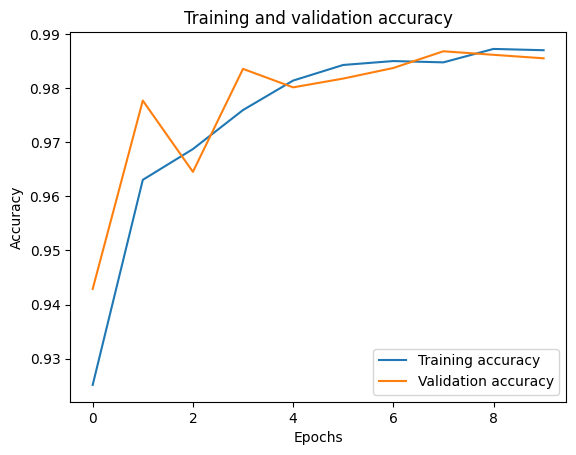

In [11]:

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Seaborn
Similarly, we can do the same in Seaborn. As we have seen in the case of scatter plots, we can pass in the data to Seaborn as a series of values explicitly or through a pandas DataFrame. Let’s plot the training loss and validation loss in the following using a pandas DataFrame:

       loss  accuracy  val_loss  val_accuracy
0  0.604188  0.925142  0.152681      0.942890
1  0.136024  0.963052  0.136336      0.977709
2  0.099318  0.968742  0.091305      0.964530
3  0.083627  0.975956  0.075599      0.983567
4  0.061370  0.981406  0.066105      0.980150
5  0.046938  0.984291  0.076124      0.981777
6  0.047027  0.985012  0.062218      0.983729
7  0.054905  0.984772  0.050874      0.986821
8  0.042852  0.987257  0.058489      0.986170
9  0.038987  0.987016  0.070131      0.985519


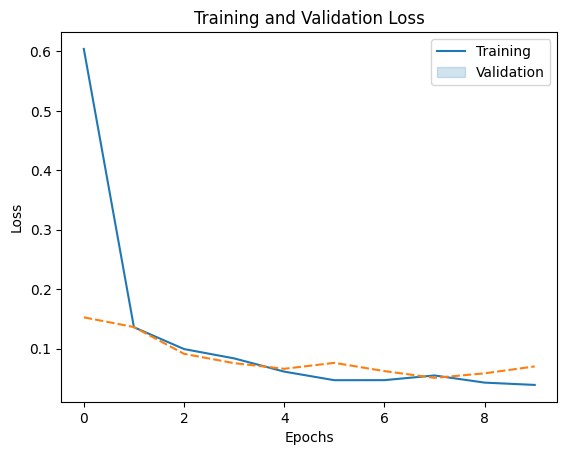

In [12]:
# Create pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)
 
# Plot using Seaborn
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()